In [1]:
%matplotlib inline
import basketballcrawler as bc
import matplotlib.pyplot as plt

Loading in the player dictionary from JSON is straightforward:

In [2]:
players = bc.load_player_dictionary("players.json")

Player positions, height, and weight, are already stored in the player objects. We could make a scatter plot by position:

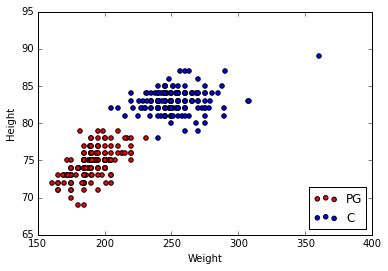

In [3]:
point_guards =  [players[name] for name in players if "Point Guard" in players[name].positions]
centers = [players[name] for name in players if "Center" in players[name].positions]

pg_weights = [int(p.weight) for p in point_guards]
c_weights = [int(p.weight) for p in centers]

# getting the heights requires parsing of strings, e.g. "6-3" -> 75 (inches)
def parse_height_value(height_string):
    ft,inches = [int(val) for val in height_string.split('-')]
    return ft*12 + inches

pg_heights = [parse_height_value(p.height) for p in point_guards]
c_heights = [parse_height_value(p.height) for p in centers]  

plt.scatter(pg_weights,pg_heights,c="red",label="PG")
plt.scatter(c_weights,c_heights,c="blue",label="C")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.legend(loc=4)

That's a pretty interesting outlier. Let's see who it is:

In [4]:
print [p.name for p in centers if int(p.weight) > 350]

[u'Sim Bhullar']


We can also delve into game-by-game stats for individual players.

In [5]:
pau_games = bc.game_logs(players, u'Pau Gasol')
pau_games.reset_index().head()

Date 
 +/- 
 3P 
 3P% 
 3PA 
 AST 
 Age 
 BLK 
 DFS 
 DRB 
 ... 
 ORB 
 Opp 
 PF 
 PTS 
 Rk 
 STL 
 TOV 
 TRB 
 Tm 
 WinLoss 
 
 
 
 
 0 
 2015-10-27 
 -8 
 0 
 0 
 1 
 0 
 35-113 
 6 
 18.5 
 2 
 ... 
 0 
 CLE 
 1 
 2 
 1 
 1 
 0 
 2 
 CHI 
 W (+2) 
 
 
 1 
 2015-10-28 
 23 
 0 
 NaN 
 0 
 3 
 35-114 
 1 
 32.3 
 8 
 ... 
 1 
 BRK 
 2 
 16 
 2 
 0 
 3 
 9 
 CHI 
 W (+15) 
 
 
 2 
 2015-10-30 
 -16 
 0 
 0 
 1 
 3 
 35-116 
 3 
 45.5 
 9 
 ... 
 3 
 DET 
 4 
 16 
 3 
 2 
 3 
 12 
 CHI 
 L (-4) 
 
 
 3 
 2015-11-01 
 8 
 0 
 0 
 2 
 1 
 35-118 
 1 
 31.0 
 5 
 ... 
 3 
 ORL 
 1 
 16 
 4 
 1 
 1 
 8 
 CHI 
 W (+5) 
 
 
 4 
 2015-11-03 
 -6 
 0 
 0 
 1 
 3 
 35-120 
 0 
 27.5 
 7 
 ... 
 1 
 CHO 
 0 
 13 
 5 
 0 
 0 
 8 
 CHI 
 L (-25) 
 
 
 
 5 rows × 31 columns

Now we could observe some individual stats for a player, **using the same API calls as before this PR**.

In [6]:
recent_games = pau_games.loc[pau_games.index > '2016-01-01']
recent_games.head()

+/- 
 3P 
 3P% 
 3PA 
 AST 
 Age 
 BLK 
 DFS 
 DRB 
 FG 
 ... 
 ORB 
 Opp 
 PF 
 PTS 
 Rk 
 STL 
 TOV 
 TRB 
 Tm 
 WinLoss 
 
 
 Date 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2016-01-03 
 13 
 0 
 NaN 
 0 
 6 
 35-181 
 4 
 52.8 
 12 
 7 
 ... 
 1 
 TOR 
 0 
 19 
 32 
 0 
 2 
 13 
 CHI 
 W (+2) 
 
 
 2016-01-05 
 11 
 2 
 1 
 2 
 5 
 35-183 
 3 
 55.8 
 10 
 10 
 ... 
 1 
 MIL 
 3 
 26 
 33 
 1 
 4 
 11 
 CHI 
 W (+11) 
 
 
 2016-01-07 
 14 
 0 
 0 
 1 
 4 
 35-185 
 1 
 47.5 
 13 
 8 
 ... 
 5 
 BOS 
 0 
 17 
 34 
 0 
 3 
 18 
 CHI 
 W (+9) 
 
 
 2016-01-09 
 -5 
 0 
 NaN 
 0 
 5 
 35-187 
 1 
 26.3 
 6 
 4 
 ... 
 1 
 ATL 
 0 
 10 
 35 
 0 
 4 
 7 
 CHI 
 L (-15) 
 
 
 2016-01-11 
 -10 
 0 
 NaN 
 0 
 1 
 35-189 
 1 
 31.5 
 9 
 6 
 ... 
 1 
 WAS 
 0 
 15 
 36 
 0 
 2 
 10 
 CHI 
 L (-14) 
 
 
 
 5 rows × 30 columns

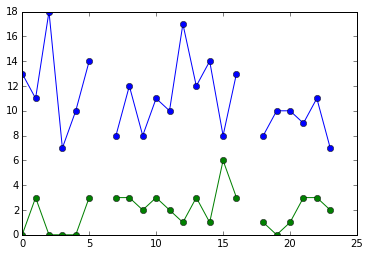

In [7]:
plt.plot(recent_games.TRB,'-o')
plt.plot(recent_games.PF,'-o')

We could use this to compare the recent performance (by +/-) of two players.

In [8]:
rw = bc.gameLogs(players, u'Russell Westbrook')
sc = bc.gameLogs(players, u'Stephen Curry')

recent_rw = rw.loc[rw.index >= '2016-01-01']
recent_sc = sc.loc[rw.index >= '2016-01-01']

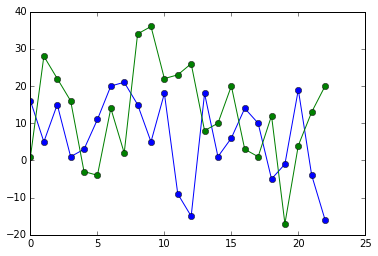

In [9]:
plt.plot(recent_rw["+/-"],'-o')
plt.plot(recent_sc["+/-"],'-o')